# Scikit-Learn TSNE
tsne與pca一樣都是降維的一種演算法，但很重要的差異是pca是線性而tsne不是，tsne透過計算相對熵(KL divergence)來投射空間，也因為tsne會計算點之間的距離，因此數據量大的情況下計算成本非常可觀。

另外，實務上較少直接利用tsne降至2維來可視化，而是先利用auto-encoder或pca降至50至300維之後再利用tsne降至2維來可視化。

## 範例
### 載入需求套件
sklearn中tsne被歸類於manifold，分別載入pca與tsne

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

### 載入MNIST
下載keras內自帶的MNIST資料集

In [9]:
from keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
#  確認資料維度
x_train.shape

(60000, 28, 28)

### 前置預處理
tsne與pca降維之前要調整為(m,n)維度，因此我們需要reshape資料集。

In [12]:
#  -1代表其餘的dimension
x_train_flatten = x_train.reshape(60000,-1)

In [13]:
#  再次確認維度
x_train_flatten.shape

(60000, 784)

### 作業開始
預計利用pca降至50維之後再利用tsne降至2維，過程當然可以利用sklearn中的`pipeline`，但為求清楚不利用`pipeline`。

兩個演算法降維皆依預設值處理，僅設置`n_components`

In [14]:
%%time
""" pca降維 """
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_flatten)

Wall time: 9.44 s


In [15]:
%%time
""" tsne降維 """
tsne = TSNE(n_components=2, verbose=1)
x_train_tsne = tsne.fit_transform(x_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.543s...
[t-SNE] Computed neighbors for 60000 samples in 722.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

上面過程記錄可以清楚看到，為了計算點之間的距離已經花費了722.584秒

### 可視化
將執行結果利用matplotlib描繪出來

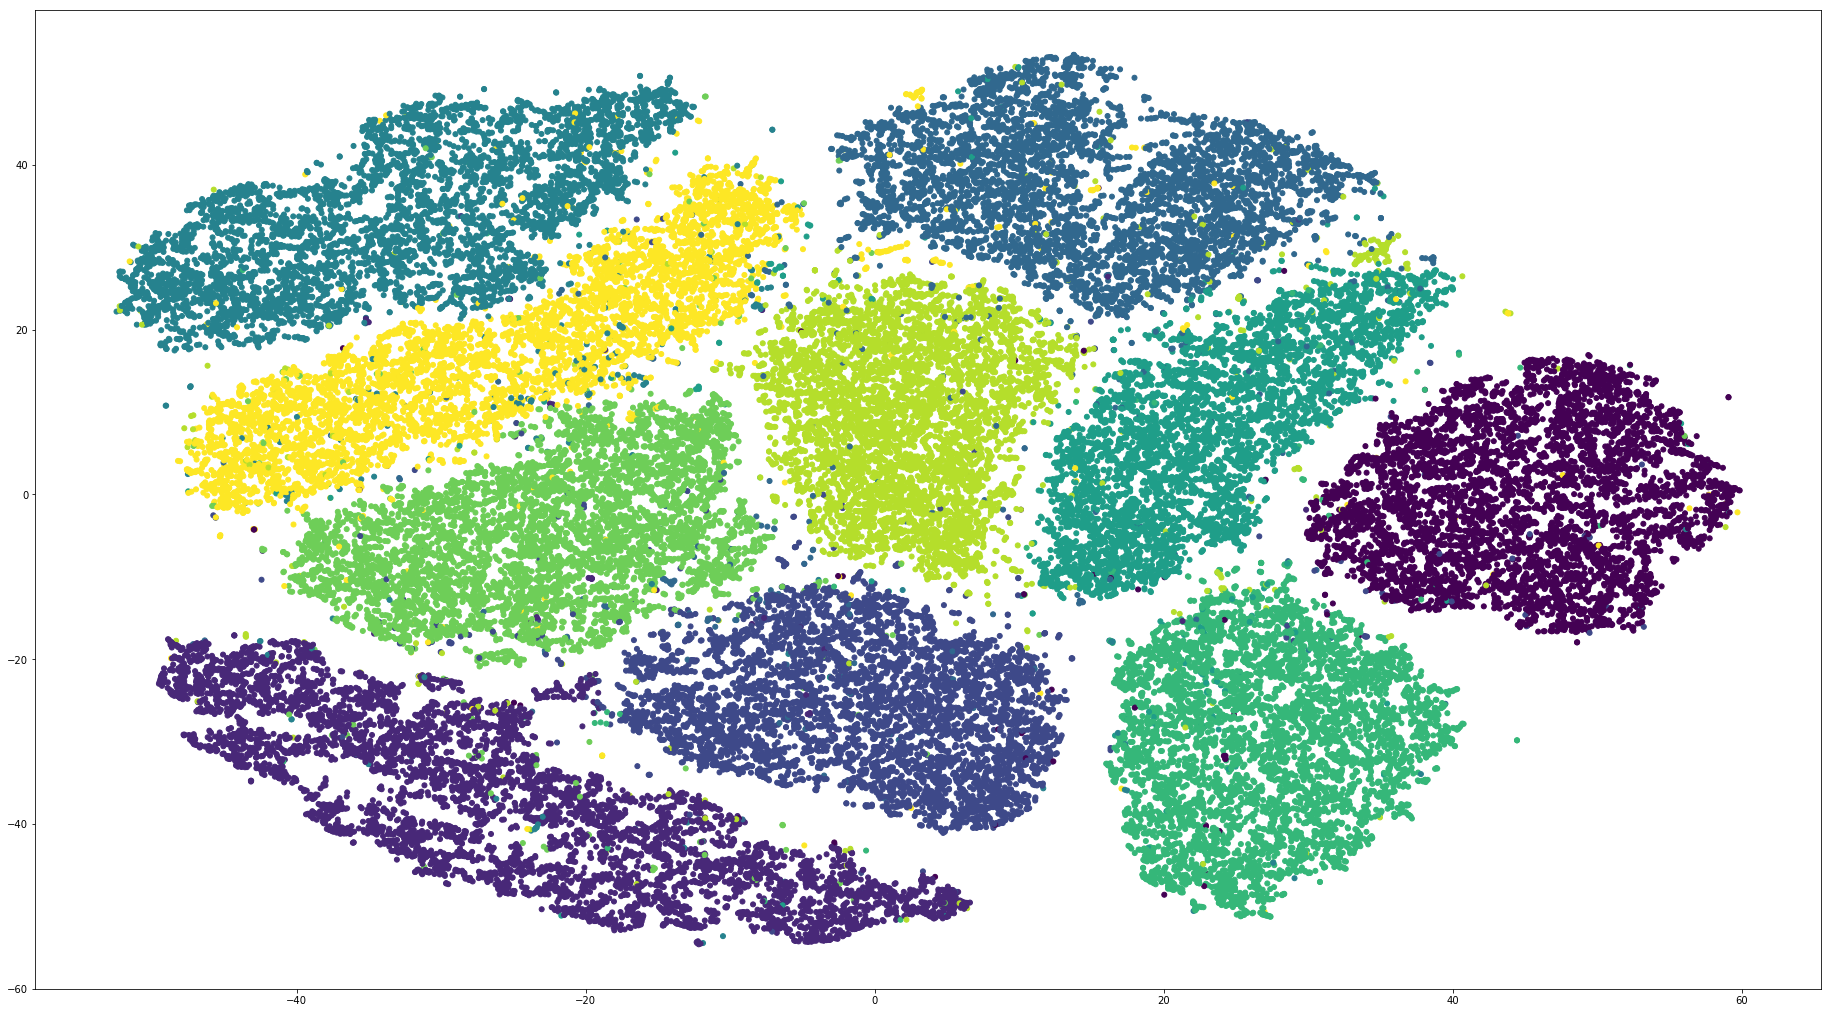

In [16]:
plt.figure(figsize=(32, 18))
plt.scatter(x_train_tsne[:, 0], 
            x_train_tsne[:, 1], 
            c=y_train[:],
            s=25)
plt.show()

### 測試直接降維

In [17]:
%%time
""" tsne降維 """
tsne2 = TSNE(n_components=2, verbose=1)
x_train_tsne = tsne2.fit_transform(x_train_flatten)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 70.892s...
[t-SNE] Computed neighbors for 60000 samples in 3668.864s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for

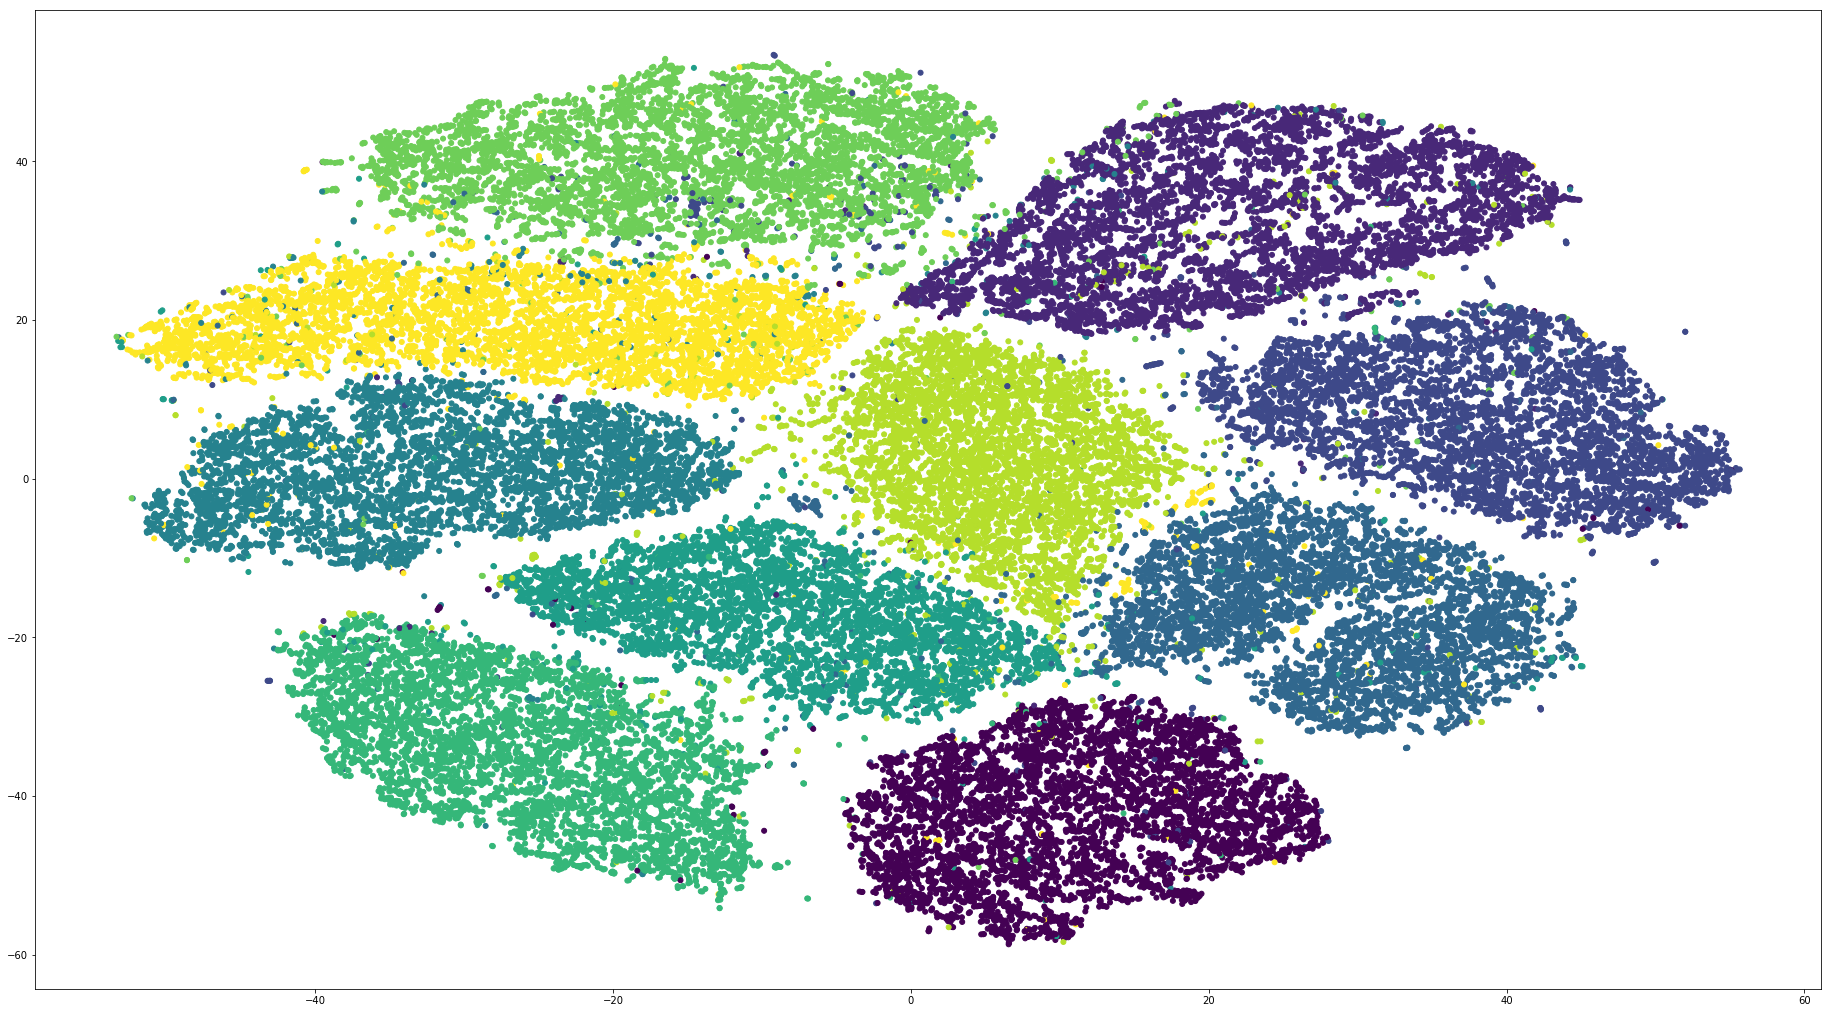

In [18]:
plt.figure(figsize=(32, 18))
plt.scatter(x_train_tsne[:, 0], 
            x_train_tsne[:, 1], 
            c=y_train[:],
            s=25)
plt.show()

## 總結

tsne是由Laurens van der Maaten 和 Geoffrey Hinton在08年所提出，沒特別需求的話一般來說會建議以sklearn預設值計算即可，但若真有需求也記得請閱讀過sklearn內參數說明建議設置。

下面連結是線上的tsne過程說明動畫，相信很直觀，非常值得一觀。  
https://distill.pub/2016/misread-tsne/